1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  

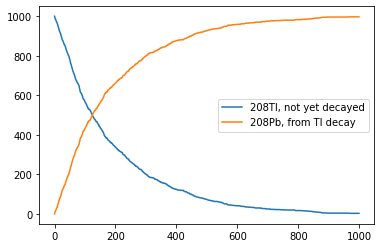

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Tl208 = np.random.rand(1000)
Pb208 = 0
tau = 3.052*60
Tls = []
Pbs = []

for t in np.arange(1000):
    p_t = 1-np.exp(-t/tau)
    Pb208 += len(Tl208[Tl208 < p_t])
    Tl208 = Tl208[Tl208 > p_t]
    Tls.append(len(Tl208))
    Pbs.append(Pb208)

plt.plot(Tls, label = '208Tl, not yet decayed')
plt.plot(Pbs, label = '208Pb, from Tl decay')
plt.legend(loc = 'best')
plt.show()

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Number of nuclei that decay - 10 steps per bin:


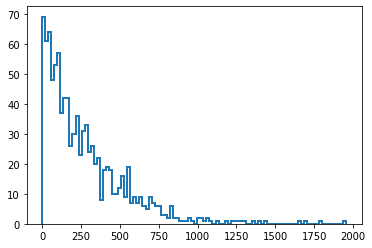

Number of nuclei not decayed - 10 steps per point:


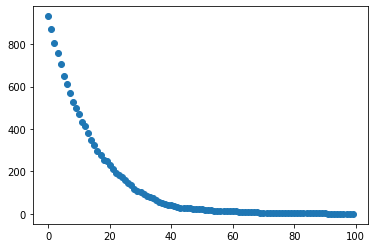

In [15]:
##### ----- Inverse transform method ----- #####
time = np.linspace(0,1000,1000)
def expon_icdf(p, mu=1./tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/(mu*np.log(2))
u = np.random.random(1000)
v = expon_icdf(u)

print("Number of nuclei that decay - 10 steps per bin:")
his = plt.hist(v, histtype='step', bins = 100,linewidth=2)
histobins = np.array(his[0])
cum_histo = histobins.cumsum()
cum_histo  = 1000-cum_histo
plt.show()

print("Number of nuclei not decayed - 10 steps per point:")
plt.scatter(np.arange(100), cum_histo)
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [21]:
n = 1000000 #particles
z = np.random.random(n) 
sigma = 5.29*10.**2 #fm, given the a0 value.
r_squared = -2.*(sigma**2)*np.log(1.-z) #definition from theory notebook 
r = np.sqrt(r_squared)

bmax = (79.*(2./137.)*197.)/7.7 #MeV*fm/MeV => fm 

print(f"Fraction returning:\n {len(r[r<bmax])/len(r)}")

Fraction returning:
 0.001531


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

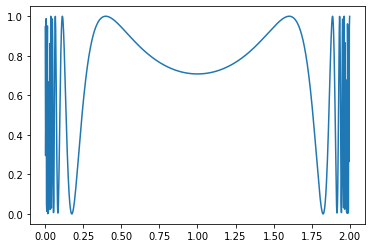

1.44954
1.4544802350610224


In [22]:
def func(x):
    return (np.sin(1/(x*(2-x))))**2
xplot=np.linspace(0.00001,1.9999999,1000) #avoiding 2 for divergence
plt.plot(xplot,func(xplot)) 
plt.show()

N=100000
##### ----- Hit/Miss ----- #####
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<func(x): count+=1
integral=2*count/N
print(integral)

##### ----- Mean Value Method ----- #####
I = 2/N*(func(2*np.random.random(100000)).sum())
print(I)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [44]:
x = 2*np.random.rand(1000)-1 #random numbers in [-1,1]
y = 2*np.random.rand(1000)-1
##### ----- Hit/Miss ----- #####
def sphere(x): #generic N dimension sphere.
    if( np.linalg.norm(x)<= 1): return 1
    else: return 0
    
N = 1000000
count = 0
count2 = 0
for i in x:
    for j in y:
        if (i*i+j*j)<1: count +=1 #specific 2D method
        count2 +=sphere([i,j]) #generic method
print(f"Result with specific-2D method: {count*4/N}") 
print(f"Result with general method for 2D: {count2*4/N}")
print(f"2D sphere: expected pi (R=1): {np.pi}")

dim = 10
countdim = 0
for i in range(N):
    countdim+=sphere(np.random.random(dim)) #generic method for 10D sphere

print(f"\n10D sphere: expected pi**5/120 (R=1): {np.pi**5/120}")
print(f"Result with general method for 10D: {countdim*2**dim/N}")

Result with specific-2D method: 3.15898
Result with general method for 2D: 3.15898
2D sphere: expected pi (R=1): 3.141592653589793

10D sphere: expected pi**5/120 (R=1): 2.550164039877345
Result with general method for 10D: 2.646016


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

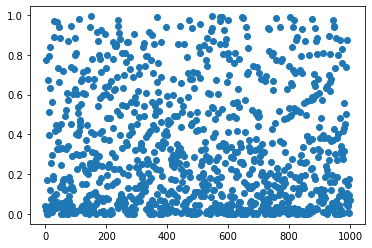

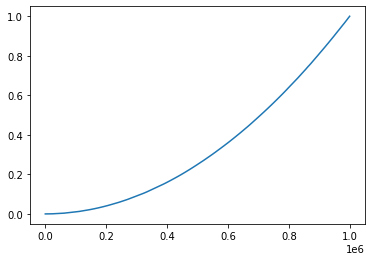

1nFinal results in accordance to what expected: [0.8389366]

We can also notice we would have found a wrong result simply computing montecarlo integration with random numbers uniformly generated!
Here it is the wrong result: [0.76009051]


In [20]:
def function(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))
def w(x):
    return 1/np.sqrt(x)

def f(x):
    return x**(2) #inverse cdf for the needed pdf.

N = 1000000
x = f(np.random.random(N)) #random numbers distributed accorgingly to f.
plt.plot(x[:1000], linestyle = 'none', marker = 'o') #plotting the first 1000 points
plt.show()
x.sort() #sorting them in order to show their "trend". The distribution is not clearly uniform,
         # otherwise we would have had a line.
plt.plot(x) #plotting all points
plt.show()
res = np.sum(function(x)/w(x))*2./x.shape  #calculating the integral with such distribution, minding also 
                                           #the weigth function.
print(f"1nFinal results in accordance to what expected: {res}")

print(f"\nWe can also notice we would have found a wrong result simply computing montecarlo integration with random numbers uniformly generated!")

x2 = np.random.random(N)
res2 = np.sum(function(x2)/w(x2))*2./x2.shape #wrong sampling: function "problems" arise due to convergence issues
print(f"Here it is the wrong result: {res2}")